In [44]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
%matplotlib inline

In [45]:
df_o = pd.read_csv('Desktop/Thinkful/Life Expectancy Data.csv')
df_o.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [46]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

My goal in this challenge is to find the factors that affect the life expectancy. Specifically, I need to find out which factors increase the expected life in the countries and which factors decrease it.


In [47]:
df_o.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df_o.isnull().sum()*100/df_o.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [49]:
df_o.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



## 1. Detect the problems with the data such as missing values and outliers. Are there any non- sense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regard- ing the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [50]:
df = df_o.copy()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

I discovered that we have spaces in Columns. Now I'm going to remove them.

In [51]:
df = df_o.copy()

df.columns = ['_'.join(x.split()) for x in list([x.str.strip().str.lower() for x in [df.columns]])[0]]
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [52]:
# Make copy of dataframe
# Create a list of all columns we want to work on.
fill_list = ["life_expectancy", "adult_mortality", "alcohol", 
             "hepatitis_b", "bmi", "polio", 
             "total_expenditure", "diphtheria",
             "gdp", "thinness_1-19_years", "thinness_5-9_years", "population", "income_composition_of_resources", "schooling"]
# Fill in all missing values from the column with the average of the same column
country = df["country"].unique()

for col in fill_list:
    for state in country: 
        if len(df.loc[df["country"] == state][col].unique())==1: 
            #col value is all null for that year, then fill it with 0 
            df.loc[df["country"] == state,  col]= df.loc[df["country"] == state,  col].fillna(0)
        else: 
            df.loc[df['country'] == state,  col] = df.loc[df["country"] == state, col].fillna(df[(df["country"] == state) & (df[col].isnull()==False) ][col].mean())

In [53]:
df.isnull().sum()*100/df.isnull().count()

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

Now we'll take a look at outliers.

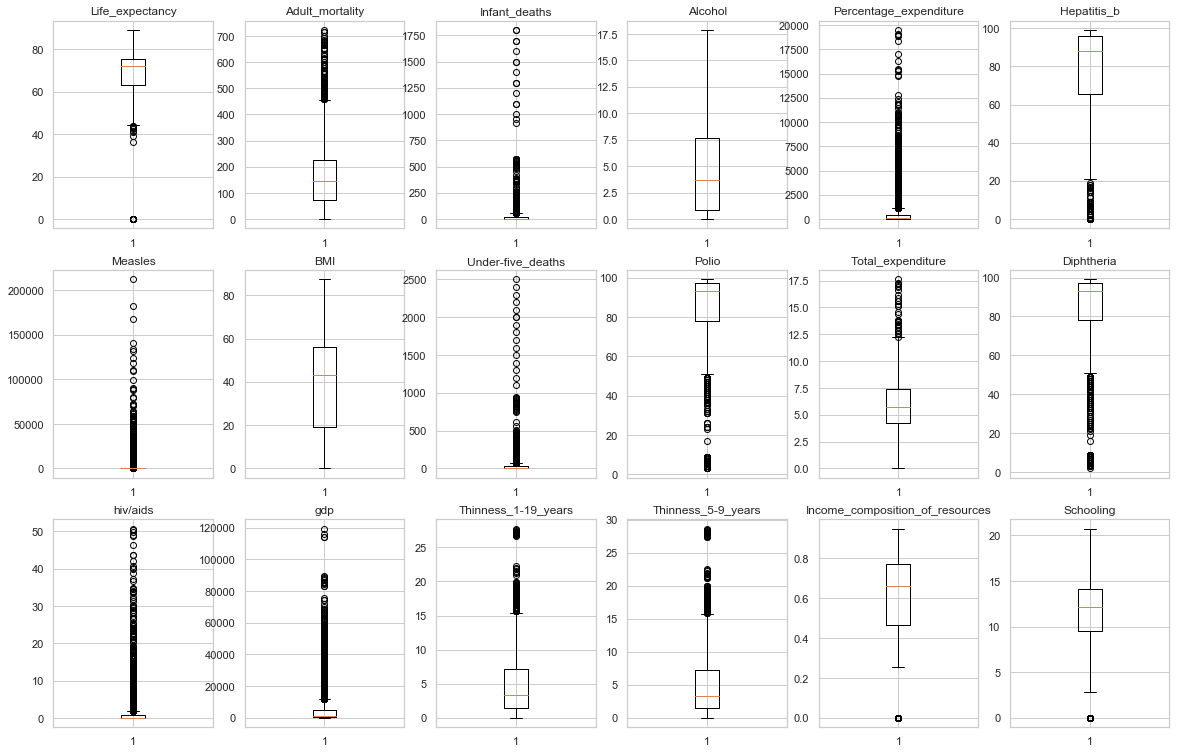

In [54]:
plt.figure(figsize = (20, 13))

plt.subplot(3,6,1)
plt.boxplot(df["life_expectancy"])
plt.title("Life_expectancy")

plt.subplot(3,6,2)
plt.boxplot(df["adult_mortality"])
plt.title("Adult_mortality")

plt.subplot(3,6,3)
plt.boxplot(df["infant_deaths"])
plt.title("Infant_deaths")

plt.subplot(3,6,4)
plt.boxplot(df["alcohol"])
plt.title("Alcohol")

plt.subplot(3,6,5)
plt.boxplot(df["percentage_expenditure"])
plt.title("Percentage_expenditure")

plt.subplot(3,6,6)
plt.boxplot(df["hepatitis_b"])
plt.title("Hepatitis_b")

plt.subplot(3,6,7)
plt.boxplot(df["measles"])
plt.title("Measles")

plt.subplot(3,6,8)
plt.boxplot(df["bmi"])
plt.title("BMI")

plt.subplot(3,6,9)
plt.boxplot(df["under-five_deaths"])
plt.title("Under-five_deaths")

plt.subplot(3,6,10)
plt.boxplot(df["polio"])
plt.title("Polio")

plt.subplot(3,6,11)
plt.boxplot(df["total_expenditure"])
plt.title("Total_expenditure")

plt.subplot(3,6,12)
plt.boxplot(df["diphtheria"])
plt.title("Diphtheria")

plt.subplot(3,6,13)
plt.boxplot(df["hiv/aids"])
plt.title("hiv/aids")

plt.subplot(3,6,14)
plt.boxplot(df["gdp"])
plt.title("gdp")

plt.subplot(3,6,15)
plt.boxplot(df["thinness_1-19_years"])
plt.title("Thinness_1-19_years")

plt.subplot(3,6,16)
plt.boxplot(df["thinness_5-9_years"])
plt.title("Thinness_5-9_years")

plt.subplot(3,6,17)
plt.boxplot(df["income_composition_of_resources"])
plt.title("Income_composition_of_resources")

plt.subplot(3,6,18)
plt.boxplot(df["schooling"])
plt.title("Schooling")


plt.show()

Text(0.5, 1.0, 'Population')

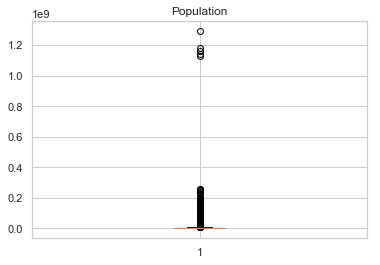

In [55]:

plt.boxplot(df["population"])
plt.title("Population")

Let's try the "Tukey's method" to see how many outliers we have.

In [56]:
list_of_columns = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

In [57]:
for col in list_of_columns:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((df[col] > max_val) 
                      | (df[col] < min_val))[0])), len((np.where((df[col] > max_val) | 
                                                    (df[col] < min_val))[0]))*100/1987))
   



Number of outliers for life_expectancy is: 20 and it is 1.0065425264217414 percent.
Number of outliers for adult_mortality is: 85 and it is 4.2778057372924 percent.
Number of outliers for infant_deaths is: 315 and it is 15.853044791142425 percent.
Number of outliers for alcohol is: 0 and it is 0.0 percent.
Number of outliers for percentage_expenditure is: 389 and it is 19.577252138902868 percent.
Number of outliers for hepatitis_b is: 333 and it is 16.758933064921994 percent.
Number of outliers for measles is: 542 and it is 27.27730246602919 percent.
Number of outliers for bmi is: 0 and it is 0.0 percent.
Number of outliers for under-five_deaths is: 394 and it is 19.828887770508302 percent.
Number of outliers for polio is: 290 and it is 14.594866633115249 percent.
Number of outliers for total_expenditure is: 34 and it is 1.7111222949169602 percent.
Number of outliers for diphtheria is: 309 and it is 15.551082033215904 percent.
Number of outliers for hiv/aids is: 542 and it is 27.277302

Text(0.5, 1.0, 'life_expectancy_winsorized')

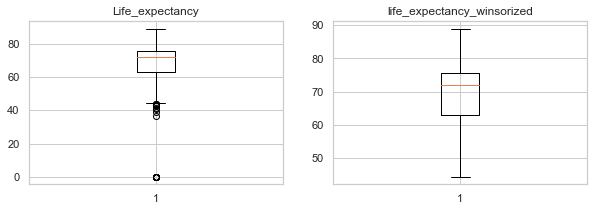

In [58]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["life_expectancy"])
plt.title("Life_expectancy")

life_expectancy_winsorized = winsorize(df["life_expectancy"], (0.007, 0))
plt.subplot (1,2,2)
plt.boxplot(life_expectancy_winsorized)
plt.title("life_expectancy_winsorized")

Text(0.5, 1.0, 'infant_deaths_winsorized')

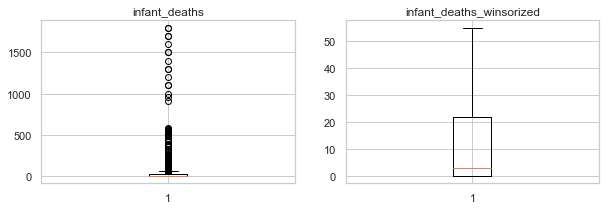

In [59]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["infant_deaths"])
plt.title("infant_deaths")

infant_deaths_winsorized = winsorize(df["infant_deaths"], (0, 0.109))
plt.subplot (1,2,2)
plt.boxplot(infant_deaths_winsorized)
plt.title("infant_deaths_winsorized")

Text(0.5, 1.0, 'adult_mortality_winsorized')

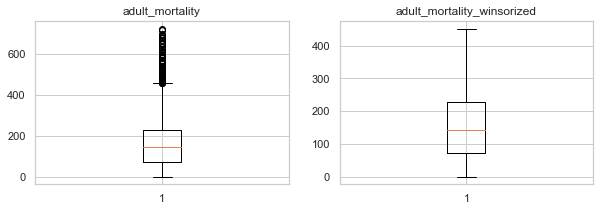

In [79]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["adult_mortality"])
plt.title("adult_mortality")

adult_mortality_winsorized = winsorize(df["adult_mortality"], (0, 0.03))
plt.subplot (1,2,2)
plt.boxplot(adult_mortality_winsorized)
plt.title("adult_mortality_winsorized")


Text(0.5, 1.0, 'percentage_expenditure_winsorized')

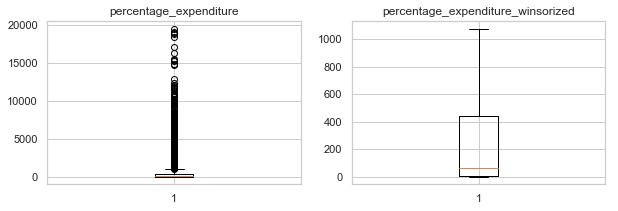

In [60]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["percentage_expenditure"])
plt.title("percentage_expenditure")

percentage_expenditure_winsorized = winsorize(df["percentage_expenditure"], (0, 0.135))
plt.subplot (1,2,2)
plt.boxplot(percentage_expenditure_winsorized)
plt.title("percentage_expenditure_winsorized")

Text(0.5, 1.0, 'hepatitis_b_winsorized')

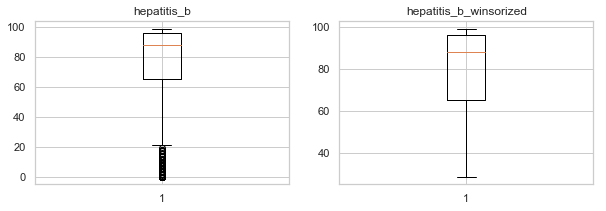

In [61]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["hepatitis_b"])
plt.title("hepatitis_b")

hepatitis_b_winsorized = winsorize(df["hepatitis_b"], (0.12, 0))
plt.subplot (1,2,2)
plt.boxplot(hepatitis_b_winsorized)
plt.title("hepatitis_b_winsorized")

Text(0.5, 1.0, 'measles_winsorized')

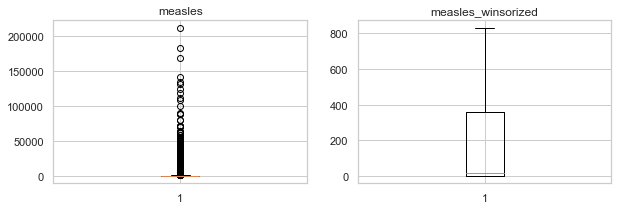

In [62]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["measles"])
plt.title("measles")

measles_winsorized = winsorize(df["measles"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(measles_winsorized)
plt.title("measles_winsorized")

Text(0.5, 1.0, 'under_five_deaths_winsorized')

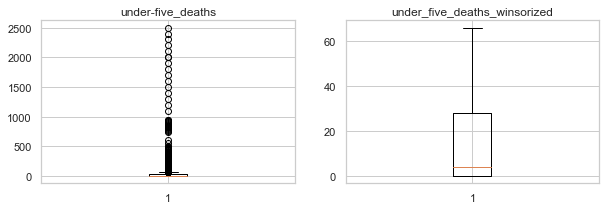

In [63]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["under-five_deaths"])
plt.title("under-five_deaths")

under_five_deaths_winsorized = winsorize(df["under-five_deaths"], (0, 0.14))
plt.subplot (1,2,2)
plt.boxplot(under_five_deaths_winsorized)
plt.title("under_five_deaths_winsorized")

Text(0.5, 1.0, 'polio_winsorized')

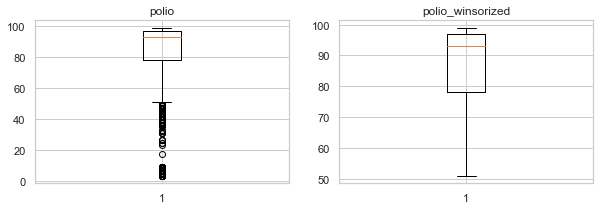

In [64]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["polio"])
plt.title("polio")

polio_winsorized = winsorize(df["polio"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(polio_winsorized)
plt.title("polio_winsorized")

Text(0.5, 1.0, 'total_expenditure_winsorized')

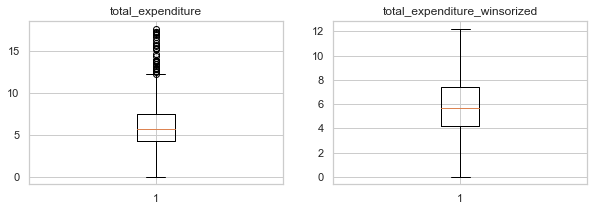

In [65]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["total_expenditure"])
plt.title("total_expenditure")

total_expenditure_winsorized = winsorize(df["total_expenditure"], (0, 0.012))
plt.subplot (1,2,2)
plt.boxplot(total_expenditure_winsorized)
plt.title("total_expenditure_winsorized")

Text(0.5, 1.0, 'diphtheria_winsorized')

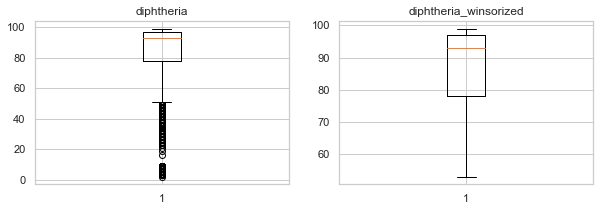

In [66]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["diphtheria"])
plt.title("diphtheria")

diphtheria_winsorized = winsorize(df["diphtheria"], (0.11, 0))
plt.subplot (1,2,2)
plt.boxplot(diphtheria_winsorized)
plt.title("diphtheria_winsorized")

Text(0.5, 1.0, 'hiv_aids_winsorized')

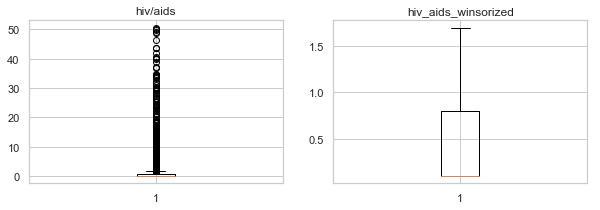

In [67]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["hiv/aids"])
plt.title("hiv/aids")

hiv_aids_winsorized = winsorize(df["hiv/aids"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(hiv_aids_winsorized)
plt.title("hiv_aids_winsorized")

Text(0.5, 1.0, 'gdp_winsorized')

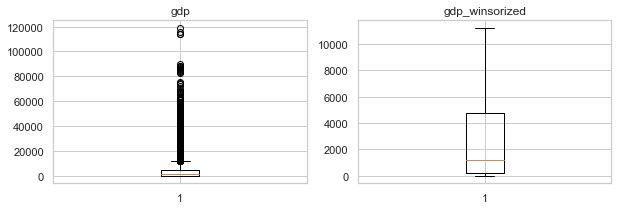

In [68]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["gdp"])
plt.title("gdp")

gdp_winsorized = winsorize(df["gdp"], (0, 0.15))
plt.subplot (1,2,2)
plt.boxplot(gdp_winsorized)
plt.title("gdp_winsorized")

Text(0.5, 1.0, 'population_winsorized')

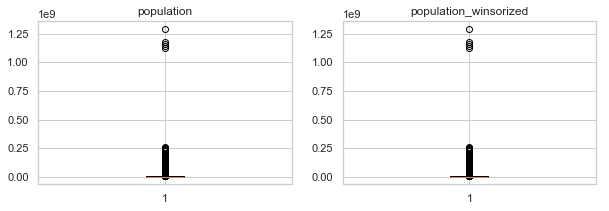

In [87]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["population"])
plt.title("population")

population_winsorized = winsorize(df["population"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(population_winsorized)
plt.title("population_winsorized")

#I'M NOT SURE WE SHOULD DO THIS FOR POPULATION

Text(0.5, 1.0, 'thinness_1_19_years_winsorized')

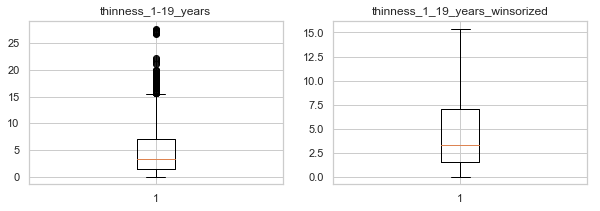

In [70]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["thinness_1-19_years"])
plt.title("thinness_1-19_years")

thinness_1_19_years_winsorized = winsorize(df["thinness_1-19_years"], (0, 0.031))
plt.subplot (1,2,2)
plt.boxplot(thinness_1_19_years_winsorized)
plt.title("thinness_1_19_years_winsorized")

Text(0.5, 1.0, 'thinness_5_9_years_winsorized')

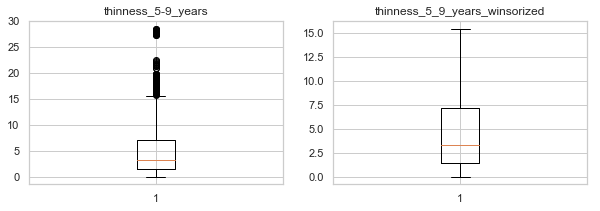

In [71]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["thinness_5-9_years"])
plt.title("thinness_5-9_years")

thinness_5_9_years_winsorized = winsorize(df["thinness_5-9_years"], (0, 0.035))
plt.subplot (1,2,2)
plt.boxplot(thinness_5_9_years_winsorized)
plt.title("thinness_5_9_years_winsorized")

Text(0.5, 1.0, 'income_composition_of_resources_winsorized')

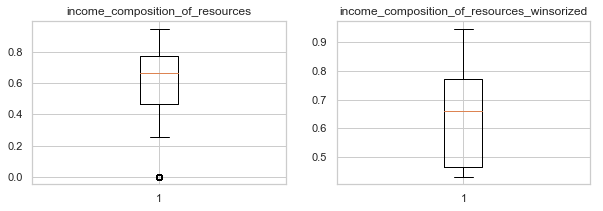

In [72]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["income_composition_of_resources"])
plt.title("income_composition_of_resources")

income_composition_of_resources_winsorized = winsorize(df["income_composition_of_resources"], (0.2, 0))
plt.subplot (1,2,2)
plt.boxplot(income_composition_of_resources_winsorized)
plt.title("income_composition_of_resources_winsorized")

Text(0.5, 1.0, 'schooling_winsorized')

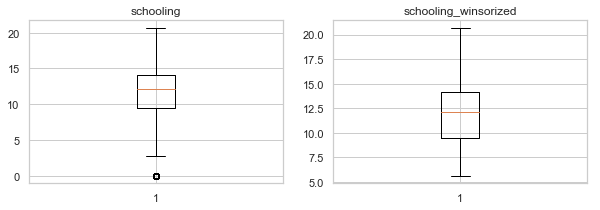

In [73]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["schooling"])
plt.title("schooling")

schooling_winsorized = winsorize(df["schooling"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(schooling_winsorized)
plt.title("schooling_winsorized")

Text(0.5, 1.0, 'alcohol_winsorized')

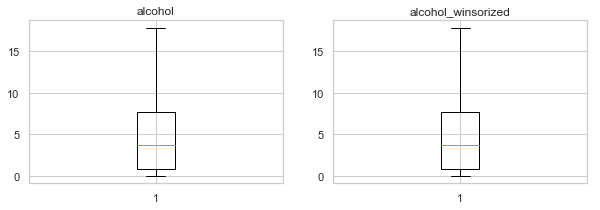

In [82]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["alcohol"])
plt.title("alcohol")

alcohol_winsorized = winsorize(df["alcohol"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(alcohol_winsorized)
plt.title("alcohol_winsorized")


Text(0.5, 1.0, 'bmi_winsorized')

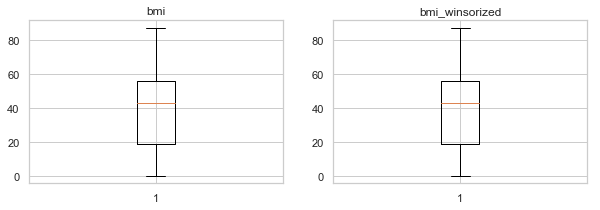

In [84]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(df["bmi"])
plt.title("bmi")

bmi_winsorized = winsorize(df["bmi"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(bmi_winsorized)
plt.title("bmi_winsorized")

In [88]:
list_winsorized = [life_expectancy_winsorized, adult_mortality_winsorized, infant_deaths_winsorized, 
                   alcohol_winsorized, percentage_expenditure_winsorized, hepatitis_b_winsorized,
                   measles_winsorized, bmi_winsorized, under_five_deaths_winsorized, polio_winsorized,
                   total_expenditure_winsorized, diphtheria_winsorized, hiv_aids_winsorized, gdp_winsorized,
                   population_winsorized, thinness_1_19_years_winsorized, thinness_5_9_years_winsorized,
                   income_composition_of_resources_winsorized, schooling_winsorized]

In [89]:
for col in list_winsorized:
    q75, q25 = np.percentile(col, [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization: {}".format(len(np.where((col > max_val) 
                      | (col < min_val))[0])))
                                                                    
   

Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 438
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0



## 2. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [90]:
df['life_expectancy_winsorized']= life_expectancy_winsorized
df['adult_mortality_winsorized']=adult_mortality_winsorized
df['infant_deaths_winsorized']=infant_deaths_winsorized
df['alcohol_winsorized']=alcohol_winsorized
df['percentage_expenditure_winsorized']= percentage_expenditure_winsorized
df['hepatitis_b_winsorized']=hepatitis_b_winsorized
df['measles_winsorized']=measles_winsorized
df['bmi_winsorized']=bmi_winsorized
df['under_five_deaths_winsorized']=under_five_deaths_winsorized
df['polio_winsorized']=polio_winsorized
df['total_expenditure_winsorized']=total_expenditure_winsorized
df['diphtheria_winsorized/AIDS']=diphtheria_winsorized
df['hiv_aids_winsorized']=hiv_aids_winsorized
df['gdp_winsorized']=gdp_winsorized
df['population_winsorized']=population_winsorized
df['thinness_1_19_years_winsorized']=thinness_1_19_years_winsorized
df['thinness_5_9_years_winsorized']=thinness_5_9_years_winsorized
df['income_composition_of_resources_winsorized']=income_composition_of_resources_winsorized
df['schooling_winsorized']=schooling_winsorized

In [91]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized'],
      dtype='object')

In [92]:
df_w = df[['country', 'year', 'status','life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']].copy()

In [93]:
df_w.describe()

,year,life_expectancy_winsorized,adult_mortality_winsorized,infant_deaths_winsorized,alcohol_winsorized,percentage_expenditure_winsorized,hepatitis_b_winsorized,measles_winsorized,bmi_winsorized,under_five_deaths_winsorized,polio_winsorized,total_expenditure_winsorized,diphtheria_winsorized/AIDS,hiv_aids_winsorized,gdp_winsorized,population_winsorized,thinness_1_19_years_winsorized,thinness_5_9_years_winsorized,income_composition_of_resources_winsorized,schooling_winsorized
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.148673,161.330497,13.635126,4.574228,281.501093,77.550942,220.691287,37.877774,17.417971,85.303686,5.827762,85.476320,0.508237,3214.867490,9.925971e+06,4.650987,4.664398,0.641210,11.722124
std,4.613841,9.593575,115.532620,19.108928,4.042375,384.161450,23.706092,329.192321,20.344920,24.075262,15.630623,2.436980,15.118002,0.640847,3982.647069,5.407539e+07,3.966879,3.996149,0.159492,3.380832
min,2000.000000,44.300000,0.000000,0.000000,0.000000,0.000000,28.846154,0.000000,0.000000,0.000000,51.000000,0.000000,53.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.431000,5.600000
25%,2004.000000,63.000000,73.000000,0.000000,0.852500,4.685343,65.461538,0.000000,19.000000,0.000000,78.000000,4.220000,78.000000,0.100000,234.463634,6.281500e+03,1.500000,1.500000,0.465000,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1178.176979,5.448670e+05,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,452.000000,55.000000,17.870000,1077.712092,99.000000,831.000000,87.300000,66.000000,99.000000,12.230000,99.000000,1.700000,11224.154800,1.293859e+09,15.400000,15.500000,0.948000,20.700000


In [94]:
features = ['life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']

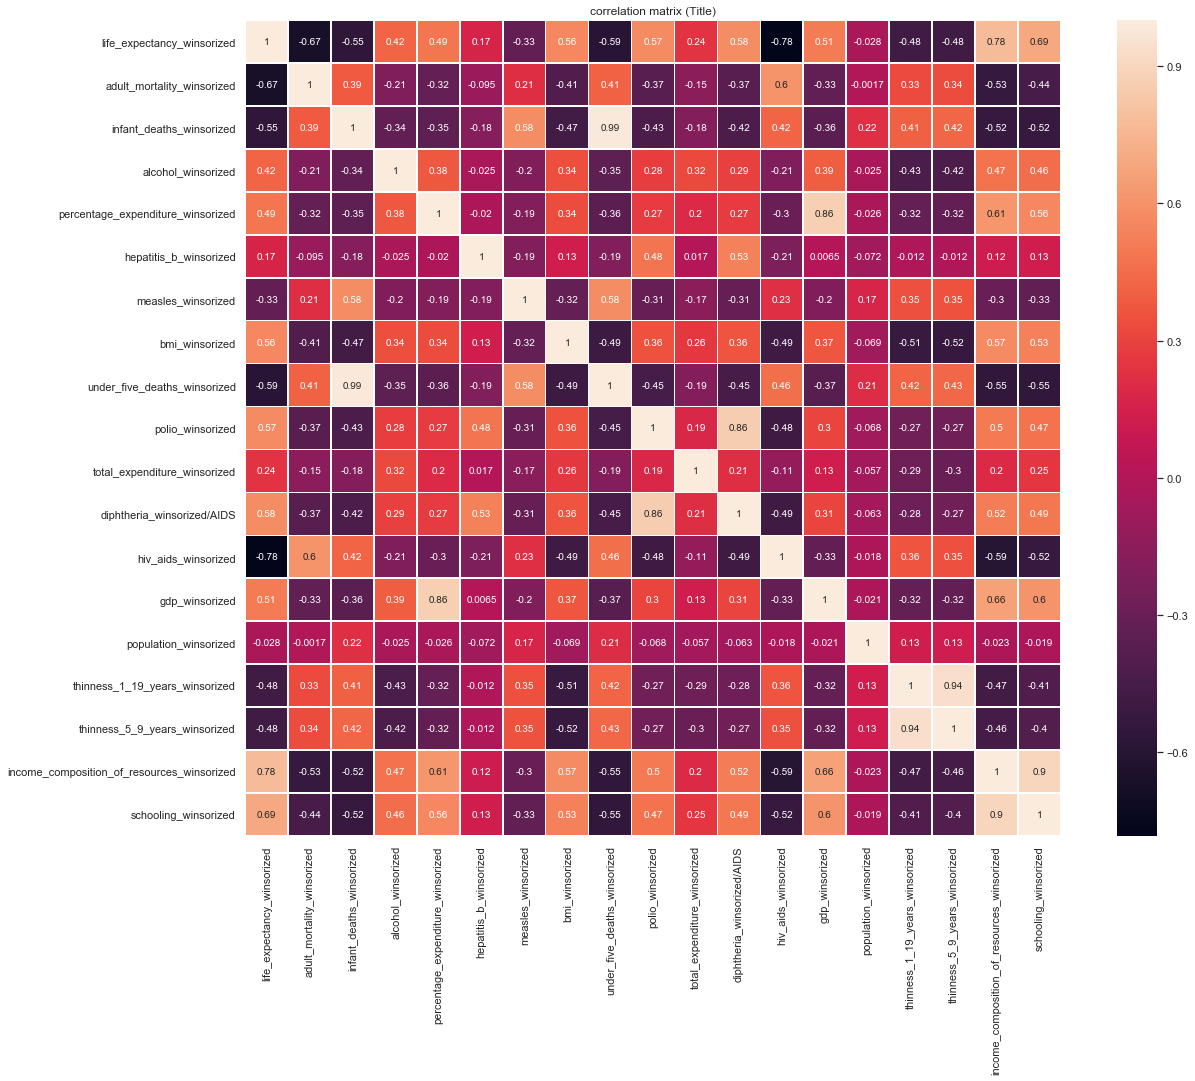

In [95]:
plt.figure(figsize=(20,15))
sns.heatmap(df_w[features].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Title)")
plt.show()

Highly Correlated pairs:

- GDP and percent expenditure (0.86)
- diphitheria and polio (0.86)
- life expectancy and income (0.78)
- life expectancy and schooling (0.69)


## 3. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


I dropped "thinness 1-19 years" as it seems to be almost the same as "thinness 5-9 years" and "infant deaths" because it is highly correlated to "under-five deaths".

#### Positive Variables:
Schooling
Income composition of resources
BMI
percentage expenditure
GDP

#### Negative Variables:
HIV/AIDS
Adult Mortality
under-five deaths
thinness 1-19 years

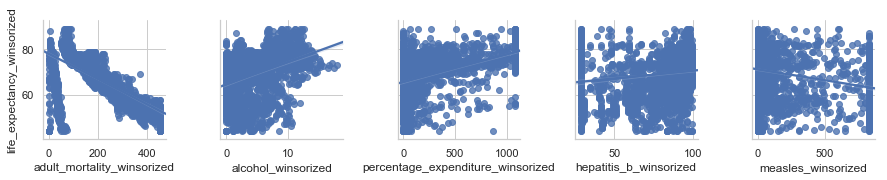

In [96]:
sns.pairplot(data=df_w,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['adult_mortality_winsorized','alcohol_winsorized','percentage_expenditure_winsorized', 'hepatitis_b_winsorized', 'measles_winsorized'], kind="reg")



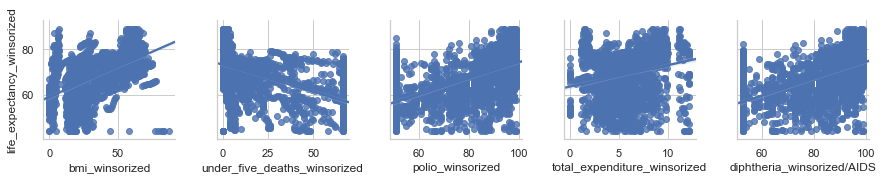

In [97]:
sns.pairplot(data=df_w,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS'], kind="reg")



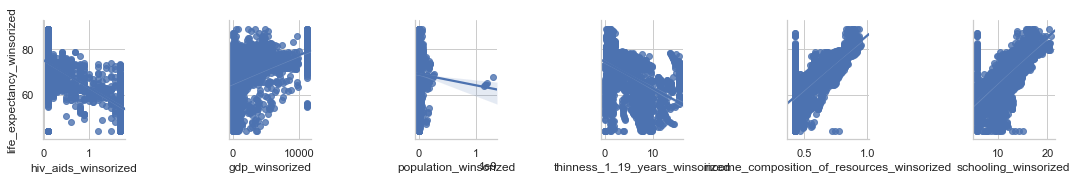

In [98]:
sns.pairplot(data=df_w,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       
       'income_composition_of_resources_winsorized', 'schooling_winsorized'], kind="reg")

In [99]:
df[['status','life_expectancy']].groupby(['status']).mean()

,life_expectancy
status,
Developed,79.197852
Developing,66.834831


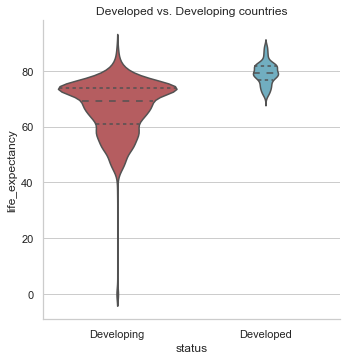

In [100]:

sns.catplot(x="status", y="life_expectancy",
            kind="violin",scale='count', inner='quartile', palette=["r", "c", "b"], data=df);
plt.title('Developed vs. Developing countries')

plt.show()

Developed countries have higher average Life Expectancy compared to Developing.

<Figure size 1440x3600 with 0 Axes>

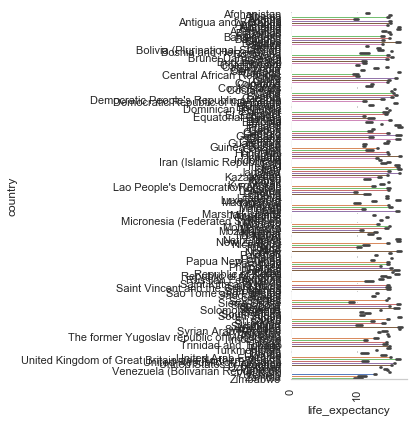

In [101]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,50))
g = sns.catplot(x="life_expectancy", y="country", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)

g.set_xticklabels(rotation=90)

Ii will try encoders to convert categorical to numerical as part of model preparation, as model can only take numerical values as input. 

In [117]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'country'. 
df['country']= label_encoder.fit_transform(df['country']) 
  
df['country'].unique() 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [121]:
# one-hot encoding the Grade variable: 
pd.get_dummies(df["status"])

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


## 4. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visual- ization.

We can see that these are the most relevant to explaining Life Expectancy in a country:
Negative: adult_mortality, under_five_deaths, hiv_aids

Positive: bmi, income_composition_of_resources, schooling